**GRIP: The Sparks Foundation**





**Data Science and Business Analytics Intern**



**Author : Vivek Dabgotra**

**Task 6: Prediction using Decision Tree Algorithm**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
#Data types of columns
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#To check any Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#To check any duplicate rows
df.duplicated().sum()


0

**Basic statistical Details**

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
#Number of distinct values
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [9]:
#unique value in species column
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
#Droping the id column as it is not required
df.drop('Id',axis=1,inplace=True)

**Data Visualization**

In [11]:
#TO see the correlation between the variables
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


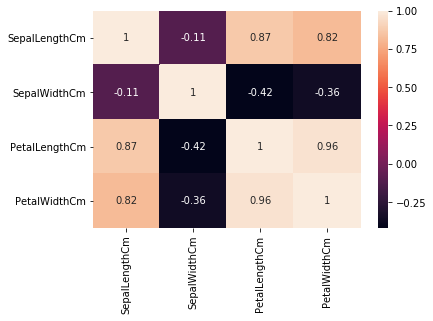

In [12]:
#Heatmap to see the correlation
sns.heatmap(df.corr(),annot=True)

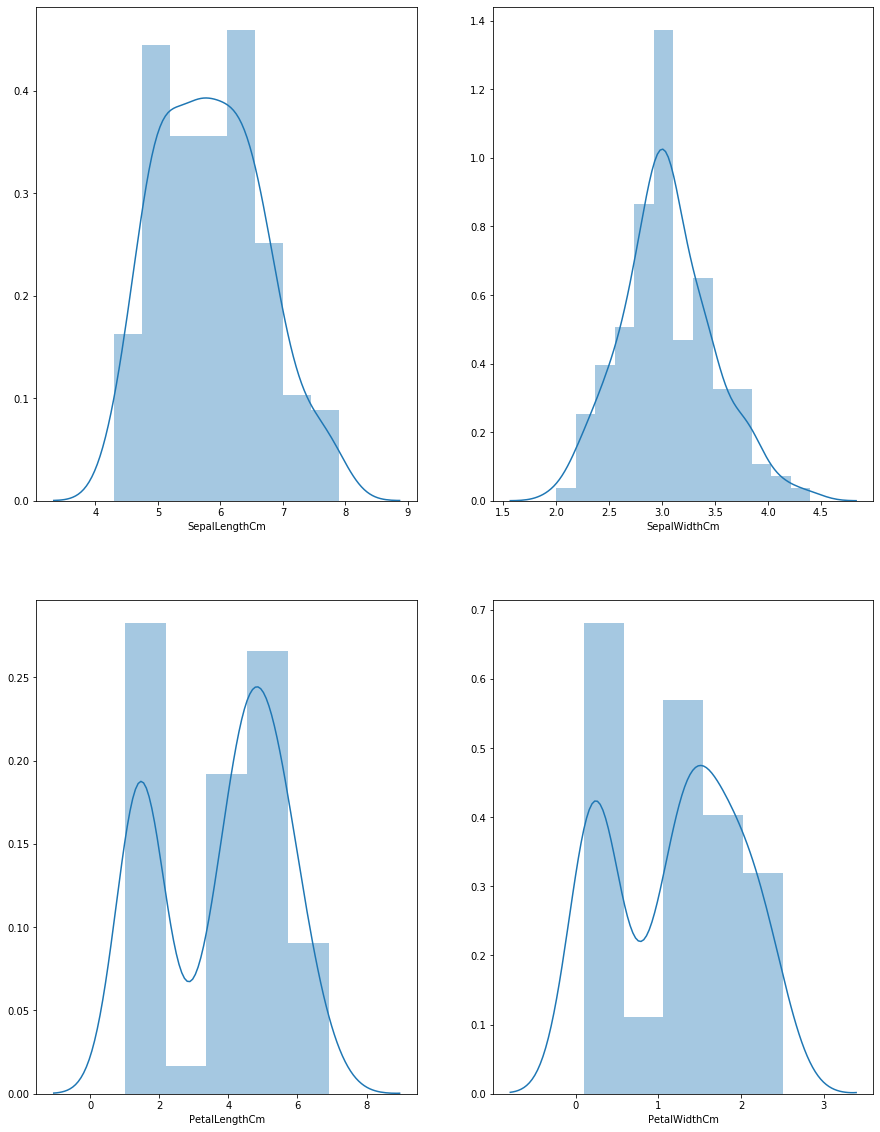

In [13]:
#distribution plot
plt.figure(figsize=(15,20))

plt.subplot(221)
sns.distplot(df.SepalLengthCm)

plt.subplot(222)
sns.distplot(df.SepalWidthCm)

plt.subplot(223)
sns.distplot(df.PetalLengthCm)

plt.subplot(224)
sns.distplot(df.PetalWidthCm)


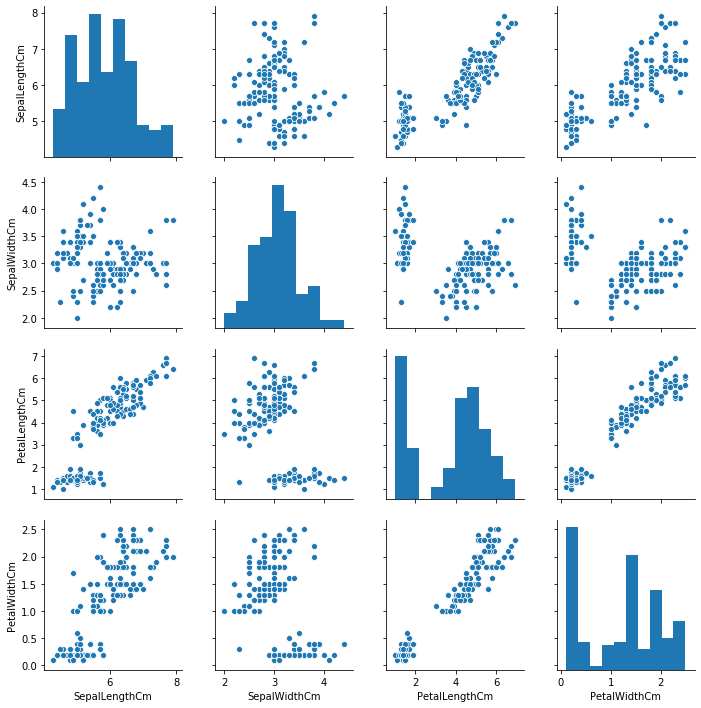

In [14]:
sns.pairplot(df)

**Model Development and Evaluation**

**Data Preparation**

In [15]:
#Separate independent and dependent var:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [16]:
#Import ibraray 
from sklearn.model_selection import train_test_split

In [17]:
#split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,  y, train_size=0.6, test_size=0.4, random_state=40)

**Training Algorithm**

In [18]:
#import libraries
from sklearn.tree import DecisionTreeClassifier

In [19]:
#Decision Tree Classifier
dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
#Prediction
y_predict=dtree.predict(x_test)
print(y_predict)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica']


In [21]:
comp_df=pd.DataFrame({"Actual_data":y_test,"Predicted_data":y_predict})
comp_df.head()

,Actual_data,Predicted_data
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-versicolor,Iris-versicolor


**Evaluating the model :**

In [22]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[20  0  0]
 [ 0 20  0]
 [ 0  4 16]]


**Classification Report**

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       0.83      1.00      0.91        20
 Iris-virginica       1.00      0.80      0.89        20

       accuracy                           0.93        60
      macro avg       0.94      0.93      0.93        60
   weighted avg       0.94      0.93      0.93        60



**Accurcy Score**

In [24]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_predict))

Accuracy Score: 0.9333333333333333


**Sample Data to the Classifier**

In [25]:
x1_new=[[4.0,3.2,1.5,0.2]]
dtree.predict(xl_new)

NameError: name 'xl_new' is not defined

In [ ]:
x2_new = [[4.0,4.2,3.5,4.2]]
dtree.predict(x2_new)

**Decision Tree Visualization**

In [ ]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4), dpi=300)
tree.plot_tree(dtree,feature_names=fn,class_names=cn,filled=True)